In [60]:
# From https://towardsdatascience.com/gather-all-the-coronavirus-data-with-python-19aa22167dea

import pandas as pd  
import json
import OpenBlender
from matplotlib import pyplot as plt

startDate = '2020-03-14T06:00:00.000Z'
endDate = '2020-03-16T06:00:00.000Z'
openBlenderToken = '5e7040a59516295b8e9d6c65OtuZ0aoeavtAJyc2RzKEljxH7lcXWT'

action = 'API_getObservationsFromDataset'
parameters = { 
 'token':openBlenderToken,
 'id_dataset':'5e6ac97595162921fda18076',
  'drop_features':["recovered","provincestate","latitude","longitude","deaths"],
 'date_filter':{
               "start_date": startDate,
               "end_date": endDate} ,
 
}

df_confirmed = pd.read_json(json.dumps(OpenBlender.call(action, parameters)['sample']), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)
df_confirmed.reset_index(drop=True, inplace=True)
df_confirmed.head(10)


Task ID: '5e7077220895fafb4a9d8d4b'.
Total estimated consumption: 12010.96 processing units.
Task confirmed. Starting download..
50.0 %
100.0 % completed.


,confirmed,deaths,timestamp,provincestate,longitude,latitude,recovered,countryregion
0,426,6,1584297183,California,-119.6816,36.1162,6,US
1,20,0,1584296419,Indiana,-86.2583,39.8494,0,US
2,28,0,1584296419,Utah,-111.8624,40.1500,0,US
3,24,0,1584296419,Connecticut,-72.7554,41.5978,0,US
4,32,0,1584296419,Wisconsin,-89.6165,44.2685,1,US
5,37,0,1584296419,Ohio,-82.7649,40.3888,0,US
6,32,0,1584296419,Maryland,-76.8021,39.0639,0,US
7,33,0,1584296419,North Carolina,-79.8064,35.6301,0,US
8,33,0,1584296419,Michigan,-84.5361,43.3266,0,US
9,35,0,1584296419,Minnesota,-93.9002,45.6945,0,US


### List unique values in the df['name'] column
df_confirmed.groupby(['countryregion','provincestate']).sum()

In [61]:
df_confirmed['date'] = pd.to_datetime(df_confirmed['timestamp'], unit='s').dt.date
# print(df_confirmed_dates)

df_confirmed_grouped = df_confirmed[['date','countryregion', 'confirmed']].groupby(['date', 'countryregion']).sum()

df_confirmed_grouped.head(300)

print(df_confirmed_grouped)

                                 confirmed
date       countryregion                  
2020-03-14 Afghanistan                  11
           Albania                      38
           Algeria                      37
           Argentina                    34
           Armenia                      18
...                                    ...
2020-03-15 United Arab Emirates         98
           United Kingdom                3
           Uzbekistan                    1
           Venezuela                    10
           Vietnam                      56

[196 rows x 1 columns]


In [62]:
df_confirmed_grouped.dtypes

# Sort by day by country
df_confirmed_grouped.sort_values('confirmed')

# df_confirmed_grouped['confirmed'].head(5)
df_china = df_confirmed_grouped.query('countryregion == "Mainland China"')
df_not_china = df_confirmed_grouped.query('countryregion != "Mainland China"')

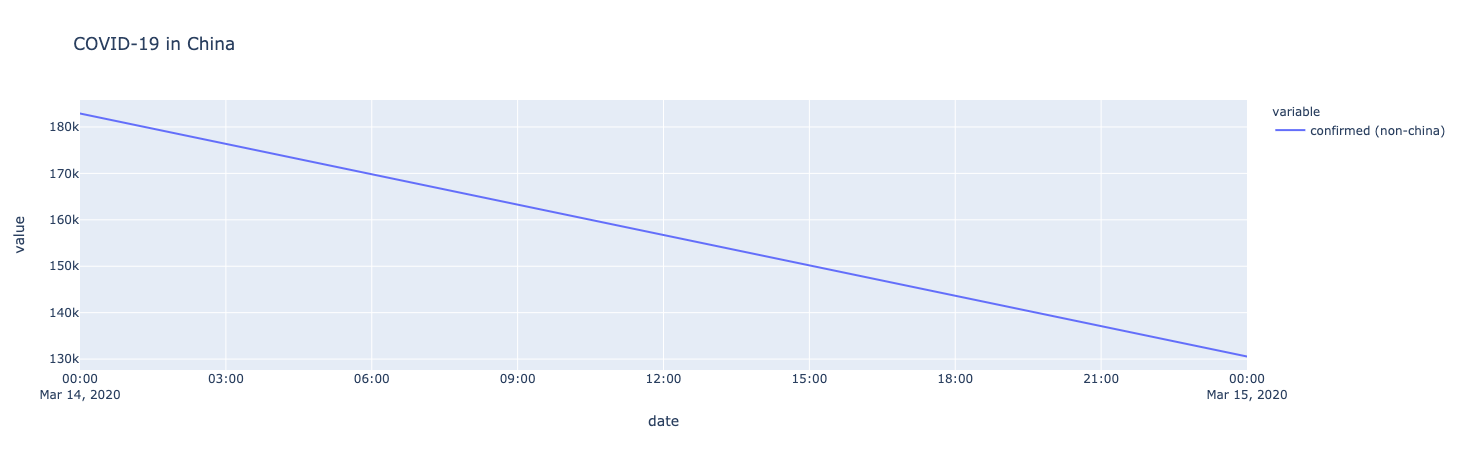

In [66]:
# Plot each countries confirmed cases as a line

# Seaborn stuff
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 14)})

import plotly.express as px

# Prepare China
df_china_prepared = df_china.droplevel('countryregion').rename(columns=lambda x: x+' (china)').reset_index().melt(id_vars="date")

# Prepare non-China
df_not_china_prepared = df_not_china.sum(level='date').fillna(0).rename(columns=lambda x: x+' (non-china)').reset_index().melt(id_vars="date")
df_not_china_prepared.head(30)

# Show fig
fig = px.line(pd.concat([df_china_prepared, df_not_china_prepared]), x='date', y='value', color='variable', title='COVID-19 in China')
fig.show()